In [ ]:
# dataset  -  https://www.kaggle.com/datasets/frabbisw/facial-age

In [1]:
import torch 
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torch import nn 
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import shutil 

import random
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image

In [2]:
 # shutil.rmtree("/kaggle/working/") 

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

In [4]:
def copy_structure(src, dest):
    if not os.path.exists(dest):
        os.makedirs(dest)
    
    for dirpath, dirnames, filenames in os.walk(src):
        dest_path = dirpath.replace(src, dest, 1)
        if not os.path.exists(dest_path):
            os.makedirs(dest_path)
        
        for filename in tqdm(filenames): 
            src_file = os.path.join(dirpath, filename)
            dest_file = os.path.join(dest_path, filename)
            shutil.copy2(src_file, dest_file)

In [5]:
os.makedirs("/kaggle/working/data", exist_ok = True) 

os.makedirs("/kaggle/working/data/childs", exist_ok = True) 
os.makedirs("/kaggle/working/data/teens", exist_ok = True) 
os.makedirs("/kaggle/working/data/adults", exist_ok = True)
os.makedirs("/kaggle/working/data/seniors", exist_ok = True)
os.makedirs("/kaggle/working/data/olds", exist_ok = True) 

base_dir = '/kaggle/input/facial-age/face_age'
new_root_dir = "/kaggle/working/data"

childs = os.path.join(new_root_dir, "childs")
teens = os.path.join(new_root_dir, "teens")
adults = os.path.join(new_root_dir, "adults")
seniors = os.path.join(new_root_dir, "seniors")
olds = os.path.join(new_root_dir, "olds")

lst = os.listdir(base_dir)

for item in ["face_age", "091", "092", "093", "095", "096", "099", "100", "101", "110"]:
    if item in lst:
        lst.remove(item)

for dir in lst:
    if dir in ["001", "002", "003", "004", "005", "006", "007", "008", "009", "010", "011", "012"]:
        copy_structure(os.path.join(base_dir, dir), childs)
    
    elif dir in ["013", "014", "015", "016", "017", "018", "019", "020", "021", "022", "023", "024", "025"]:
        copy_structure(os.path.join(base_dir, dir), teens)

    elif dir in ["026", "027", "028", "029", "030", "031", "032", "033", "034", "035", "036", "037", "038", "039",
                 "040", "041", "042", "043", "044", "045", "046", "047", "048", "049", "050", "051", "052", "053", "054", "055"]:
        copy_structure(os.path.join(base_dir, dir), adults)

    elif dir in ["056", "057", "058", "059", "060", "061", "062", "063", "064", "065", "066", "067", "068", "069",
                 "070", "071", "072", "073", "074", "075"]:
        copy_structure(os.path.join(base_dir, dir), seniors)

    elif dir in ["076", "077", "078", "079", "080", "081", "082", "083", "084", "085", "086", "087", "088", "089", "090"]:
        copy_structure(os.path.join(base_dir, dir), olds)


100%|██████████| 130/130 [00:00<00:00, 190.62it/s]


In [6]:
print(f"Childs: {len(os.listdir(childs))}"),
print(f"Teens: {len(os.listdir(teens))}"),
print(f"Adults: {len(os.listdir(adults))}"),
print(f"Seniors: {len(os.listdir(seniors))}"),
print(f"Olds: {len(os.listdir(olds))}")

Childs: 3255
Teens: 1726
Adults: 3000
Seniors: 1282
Olds: 472


In [16]:
2000 - 1684

316

In [7]:
def cut(too_long_folder, files_to_delete):
    files = os.listdir(too_long_folder)
    
    for file in tqdm(files[:files_to_delete]):
        file_path = os.path.join(too_long_folder, file)
        if os.path.isfile(file_path):
            os.remove(file_path)

In [8]:
def copy_random_files(source_dir, num_files):
    all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
    
    selected_files = random.sample(all_files, min(num_files, len(all_files)))

    for file in tqdm(selected_files):
        src_path = os.path.join(source_dir, file)
        dst_path = os.path.join(source_dir, f"{os.path.splitext(file)[0]}_copy{os.path.splitext(file)[1]}")
        shutil.copy(src_path, dst_path)


source_directory = '/kaggle/working/data/teens'  
number_of_files_to_copy = 1274
copy_random_files(source_directory, number_of_files_to_copy)

source_directory = '/kaggle/working/data/seniors'  
number_of_files_to_copy = 1718
copy_random_files(source_directory, number_of_files_to_copy)

source_directory = '/kaggle/working/data/olds' 
for i in range(6):
    number_of_files_to_copy = 450
    copy_random_files(source_directory, number_of_files_to_copy)

100%|██████████| 450/450 [00:00<00:00, 5413.11it/s]


In [13]:
source_directory = '/kaggle/working/data/olds' 
copy_random_files(source_directory, 1000)

100%|██████████| 1000/1000 [00:00<00:00, 5506.54it/s]


In [20]:
# source_directory = '/kaggle/working/data/seniors'  
# copy_random_files(source_directory, 236)

100%|██████████| 236/236 [00:00<00:00, 5028.68it/s]


In [14]:
print(f"Childs: {len(os.listdir(childs))}"),
print(f"Teens: {len(os.listdir(teens))}"),
print(f"Adults: {len(os.listdir(adults))}"),
print(f"Sen: {len(os.listdir(seniors))}"),
print(f"Olds: {len(os.listdir(olds))}")

Childs: 3255
Teens: 3000
Adults: 3000
Sen: 2564
Olds: 2677


In [20]:
4106 - 2500

1606

In [21]:
# cut(non_full_age, 1606)

In [22]:
# cut(middles, 175)

In [23]:
# len(os.listdir(seniors)), len(os.listdir(adults)), len(os.listdir(non_full_age)), len(os.listdir(middles))

In [15]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=45),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomAffine(degrees=45, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
    transforms.ToTensor(),  
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3))
])


In [16]:
root_dir = "/kaggle/working/data"
dataset = datasets.ImageFolder(root = root_dir, transform = transform)

In [17]:
dataset.classes

['adults', 'childs', 'olds', 'seniors', 'teens']

In [18]:
train_ratio = 0.8

generator = torch.Generator(device=device)
train_dataset, test_dataset, val_dataset = random_split(dataset, [train_ratio, 0.9 - train_ratio, 0.9 - train_ratio])

In [19]:
len(train_dataset), len(test_dataset), len(val_dataset)

(11597, 1450, 1449)

In [20]:
len(dataset.classes)

5

In [21]:
classes = dataset.classes

In [22]:
def output(limit, data):
    num = 0
    for img, cls in data:

        img = img.permute(1, 2, 0)
        plt.imshow(img)
        plt.title(classes[int(cls)])
        plt.axis("off")
        plt.show()

        num += 1

        if num >= limit:
            break

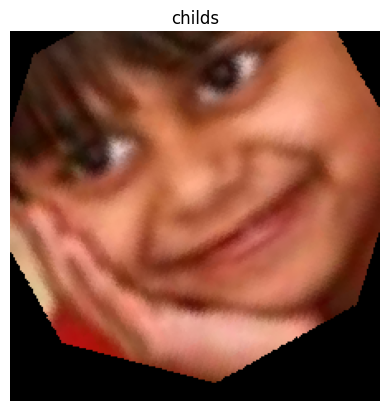

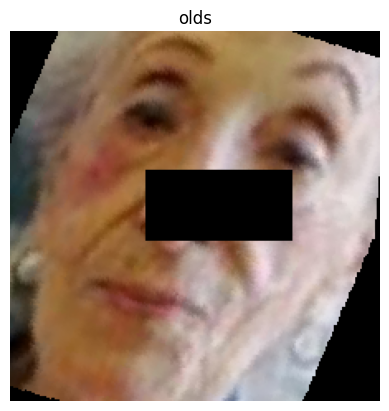

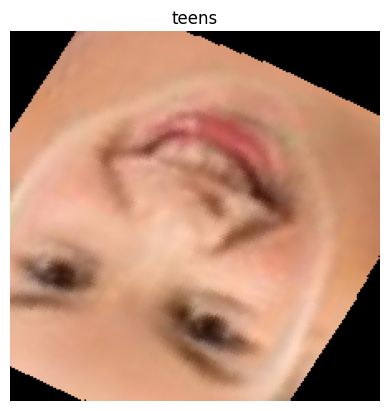

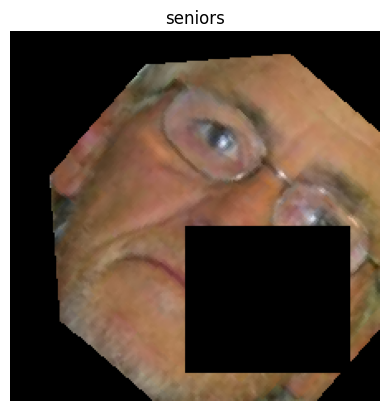

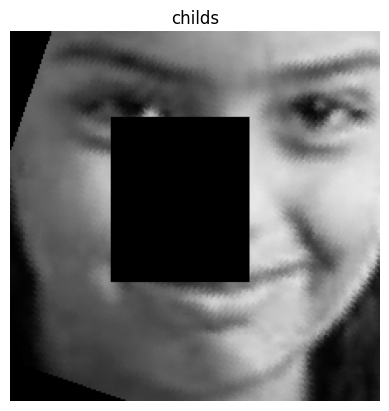

In [23]:
output(5, train_dataset)

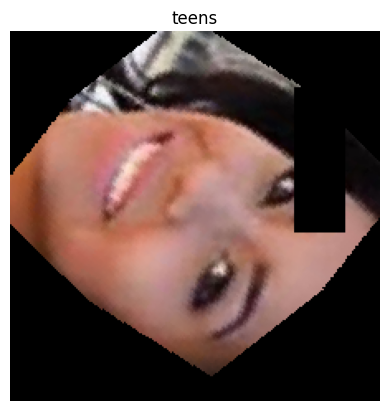

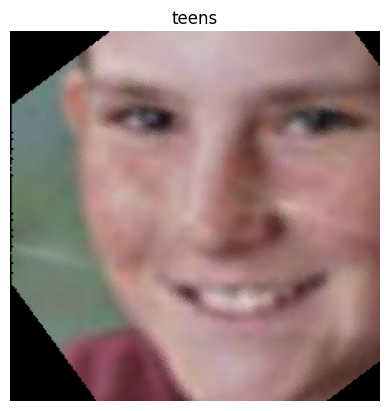

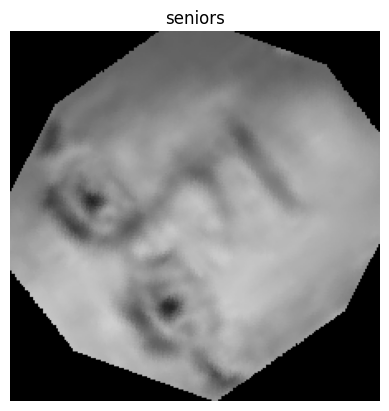

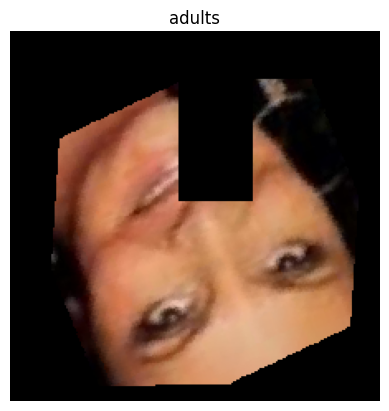

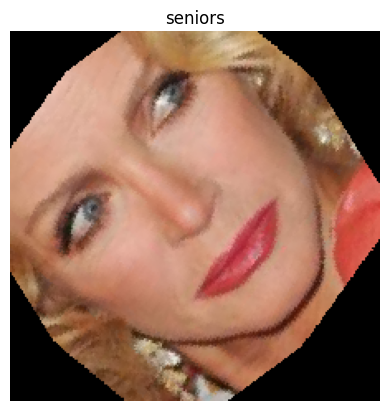

In [24]:
output(5, test_dataset)

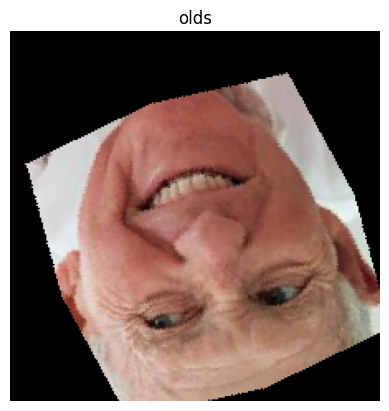

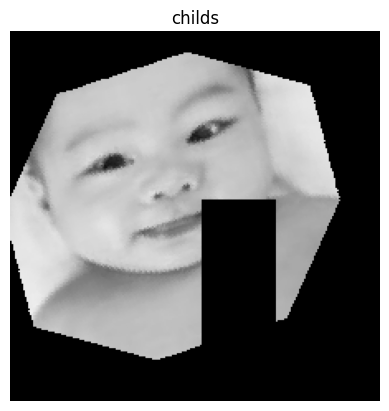

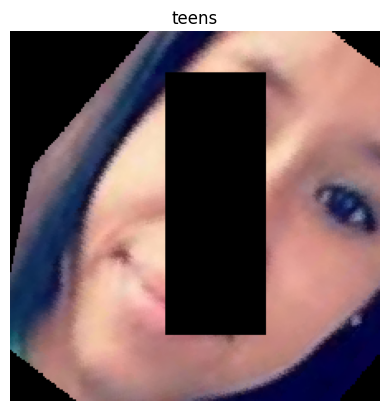

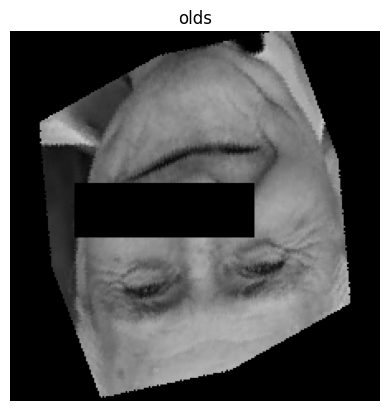

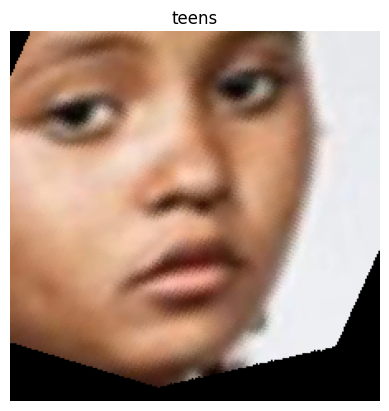

In [25]:
output(5, val_dataset)

In [26]:
batch_size = 64
train_dl = DataLoader(train_dataset, batch_size = batch_size, generator = torch.Generator(device="cpu"))
val_dl = DataLoader(val_dataset, batch_size = batch_size, generator = torch.Generator(device="cpu"))

In [24]:
x = torch.tensor([-2])
F.relu(x)

tensor([0])

In [37]:
classes

['adults', 'childs', 'olds', 'seniors', 'teens']

In [ ]:
class AgeModel(nn.Module):
    def __init__(self, age_cats=5):  
        super(AgeModel, self).__init__()

        self.base_model = models.mobilenet_v2(pretrained=True)
        in_features = self.base_model.last_channel  

        self.base_model.classifier = nn.Identity()
        
        self.age_head = nn.Linear(in_features, age_cats)

    def forward(self, x):
        features = self.base_model(x)
        age_output = self.age_head(features)

        return age_output

    def predict(self, x):
        self.eval()
        with torch.no_grad():
            t_res = self.forward(x)

            res = torch.softmax(t_res, dim=1)

        return res

In [ ]:
class AgeModel(nn.Module):
    def __init__(self, age_cats=5):
        super(AgeModel, self).__init__()

        self.base_model = models.mobilenet_v2(pretrained=True)
        in_features = self.base_model.last_channel

        self.base_model.classifier = nn.Identity()

        self.age_head = nn.Linear(in_features, age_cats)

    def forward(self, x):
        features = self.base_model(x)
        age_output = self.age_head(features)

        return age_output

    def predict(self, x):
        self.eval()
        with torch.no_grad():
            t_res = self.forward(x)

            res = torch.softmax(t_res, dim=1)

        return res

In [ ]:
class AgeModel(nn.Module):
    def __init__(self, age_cats=5):
        super(AgeModel, self).__init__()

        self.base_model = models.mobilenet_v2(pretrained=True)
        in_features = self.base_model.last_channel

        self.base_model.classifier = nn.Identity()

        self.age_head = nn.Linear(in_features, age_cats)

    def forward(self, x):
        features = self.base_model(x)
        age_output = self.age_head(features)

        return age_output

    def predict(self, x):
        self.eval()
        with torch.no_grad():
            t_res = self.forward(x)

            res = torch.softmax(t_res, dim=1)

        return res

In [ ]:
class AgeModel(nn.Module):
    def __init__(self, age_cats=5):
        super(AgeModel, self).__init__()

        self.base_model = models.mobilenet_v2(pretrained=True)
        in_features = self.base_model.last_channel

        self.base_model.classifier = nn.Identity()

        self.age_head = nn.Linear(in_features, age_cats)

    def forward(self, x):
        features = self.base_model(x)
        age_output = self.age_head(features)

        return age_output

    def predict(self, x):
        self.eval()
        with torch.no_grad():
            t_res = self.forward(x)

            res = torch.softmax(t_res, dim=1)

        return res

In [27]:
class AgeModel(nn.Module):
    def __init__(self, age_cats=5):
        super(AgeModel, self).__init__()

        self.base_model = models.mobilenet_v2(pretrained=True)
        in_features = self.base_model.last_channel

        self.base_model.classifier = nn.Identity()

        self.age_head = nn.Linear(in_features, age_cats)

    def forward(self, x):
        features = self.base_model(x)
        age_output = self.age_head(features)

        return age_output

    def predict(self, x):
        self.eval()
        with torch.no_grad():
            t_res = self.forward(x)

            res = torch.softmax(t_res, dim=1)

        return res

In [28]:
model = AgeModel()
model.to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 116MB/s] 


AgeModel(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1

In [29]:
!pip install -q torchsummary

In [30]:
from torchsummary import summary

summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [39]:
import time

def train(model, optimizer, loss_fn, train_dl, val_dl,
          metrics=None, metrics_name=None, epochs=20, device='cpu', task='regression'):
    
    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    metrics = metrics if metrics else []
    metrics_name = metrics_name if metrics_name else [metric.__name__ for metric in metrics]

    history = {} 
    history['loss'] = []
    history['val_loss'] = []
    for name in metrics_name:
        history[name] = []
        history[f'val_{name}'] = []

    start_time_train = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        start_time_epoch = time.time()

        model.train()
        history_train = {name: 0 for name in ['loss']+metrics_name}

        for batch in tqdm(train_dl):
            x    = batch[0].to(device)
            y    = batch[1].to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = y_pred.detach().cpu().numpy()
            y = y.detach().cpu().numpy()


            history_train['loss'] += loss.item() * x.size(0)
            for name, func in zip(metrics_name, metrics):
                try:
                    history_train[name] += func(y, y_pred) * x.size(0)
                except:
                    if task == 'binary': y_pred_ = y_pred.round()
                    elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)
                    history_train[name] += func(y, y_pred_) * x.size(0)

        for name in history_train:
            history_train[name] /= len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        history_val = {'val_' + name: 0 for name in metrics_name+['loss']}

        with torch.no_grad():
            for batch in tqdm(val_dl):
                x    = batch[0].to(device)
                y    = batch[1].to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)

                y_pred = y_pred.cpu().numpy()
                y = y.cpu().numpy()

                history_val['val_loss'] += loss.item() * x.size(0)
                for name, func in zip(metrics_name, metrics):
                    try:
                        history_val['val_'+name] += func(y, y_pred) * x.size(0)
                    except:
                        if task == 'binary': y_pred_ = y_pred.round()
                        elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)

                        history_val['val_'+name] += func(y, y_pred_) * x.size(0)

        for name in history_val:
            history_val[name] /= len(val_dl.dataset)

        # PRINTING RESULTS

        end_time_epoch = time.time()

        for name in history_train:
            history[name].append(history_train[name])
            history['val_'+name].append(history_val['val_'+name])

        total_time_epoch = end_time_epoch - start_time_epoch

        print(f'Epoch {epoch+1:4d} {total_time_epoch:4.0f}sec', end='\t')
        for name in history_train:
            print(f'{name}: {history[name][-1]:10.3g}', end='\t')
            print(f"val_{name}: {history['val_'+name][-1]:10.3g}", end='\t')
        print()

    # END OF TRAINING LOOP

    end_time_train       = time.time()
    total_time_train     = end_time_train - start_time_train
    print()
    print('Time total:     %5.2f sec' % (total_time_train))

    return history

In [27]:
loss = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adagrad(model.parameters(), lr=1e-3)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3, momentum=0.9)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay = 1e-4)


In [44]:
history = train(model, optimizer, loss, train_dl, val_dl,
                epochs=40,
                metrics=[accuracy_score],  
                device=device,
                task='multiclass')

train() called: model=AgeModel, opt=AdamW(lr=0.001000), epochs=40, device=cuda



100%|██████████| 22/22 [00:18<00:00,  1.20it/s]


Epoch    1  183sec	loss:       1.13	val_loss:       1.23	accuracy_score:      0.515	val_accuracy_score:      0.543	


100%|██████████| 22/22 [00:18<00:00,  1.21it/s]


Epoch    2  182sec	loss:       0.95	val_loss:       1.23	accuracy_score:      0.587	val_accuracy_score:      0.536	


100%|██████████| 22/22 [00:17<00:00,  1.24it/s]


Epoch    3  183sec	loss:      0.924	val_loss:      0.929	accuracy_score:      0.598	val_accuracy_score:      0.601	


100%|██████████| 22/22 [00:18<00:00,  1.20it/s]


Epoch    4  182sec	loss:      0.856	val_loss:      0.835	accuracy_score:      0.633	val_accuracy_score:      0.641	


100%|██████████| 22/22 [00:18<00:00,  1.21it/s]


Epoch    5  182sec	loss:      0.844	val_loss:      0.935	accuracy_score:      0.635	val_accuracy_score:      0.606	


100%|██████████| 22/22 [00:18<00:00,  1.22it/s]


Epoch    6  181sec	loss:      0.823	val_loss:      0.829	accuracy_score:      0.644	val_accuracy_score:      0.643	


100%|██████████| 22/22 [00:17<00:00,  1.24it/s]


Epoch    7  182sec	loss:      0.801	val_loss:      0.823	accuracy_score:      0.658	val_accuracy_score:      0.637	


100%|██████████| 22/22 [00:18<00:00,  1.22it/s]


Epoch    8  182sec	loss:      0.792	val_loss:      0.826	accuracy_score:      0.659	val_accuracy_score:      0.645	


100%|██████████| 22/22 [00:18<00:00,  1.21it/s]


Epoch    9  183sec	loss:      0.775	val_loss:      0.739	accuracy_score:      0.671	val_accuracy_score:      0.691	


100%|██████████| 22/22 [00:17<00:00,  1.24it/s]


Epoch   10  182sec	loss:      0.763	val_loss:      0.791	accuracy_score:      0.674	val_accuracy_score:      0.663	


100%|██████████| 22/22 [00:18<00:00,  1.22it/s]


Epoch   11  183sec	loss:      0.754	val_loss:      0.754	accuracy_score:      0.677	val_accuracy_score:      0.702	


100%|██████████| 22/22 [00:18<00:00,  1.20it/s]


Epoch   12  183sec	loss:      0.732	val_loss:      0.723	accuracy_score:      0.689	val_accuracy_score:      0.688	


100%|██████████| 22/22 [00:18<00:00,  1.20it/s]


Epoch   13  183sec	loss:      0.733	val_loss:      0.758	accuracy_score:      0.684	val_accuracy_score:      0.687	


100%|██████████| 22/22 [00:17<00:00,  1.24it/s]


Epoch   14  182sec	loss:      0.715	val_loss:      0.763	accuracy_score:      0.696	val_accuracy_score:       0.67	


100%|██████████| 22/22 [00:18<00:00,  1.20it/s]


Epoch   15  183sec	loss:      0.718	val_loss:      0.708	accuracy_score:      0.693	val_accuracy_score:      0.688	


100%|██████████| 22/22 [00:17<00:00,  1.23it/s]


Epoch   16  182sec	loss:      0.702	val_loss:       0.76	accuracy_score:      0.696	val_accuracy_score:      0.674	


100%|██████████| 22/22 [00:17<00:00,  1.24it/s]


Epoch   17  182sec	loss:      0.699	val_loss:      0.704	accuracy_score:      0.698	val_accuracy_score:        0.7	


100%|██████████| 22/22 [00:17<00:00,  1.23it/s]


Epoch   18  181sec	loss:      0.702	val_loss:      0.696	accuracy_score:      0.699	val_accuracy_score:      0.687	


100%|██████████| 22/22 [00:18<00:00,  1.21it/s]


Epoch   19  182sec	loss:      0.683	val_loss:      0.678	accuracy_score:      0.706	val_accuracy_score:      0.703	


100%|██████████| 22/22 [00:18<00:00,  1.20it/s]


Epoch   20  183sec	loss:      0.692	val_loss:      0.686	accuracy_score:      0.708	val_accuracy_score:      0.703	


100%|██████████| 22/22 [00:18<00:00,  1.22it/s]


Epoch   21  184sec	loss:      0.676	val_loss:      0.705	accuracy_score:      0.715	val_accuracy_score:      0.694	


100%|██████████| 22/22 [00:17<00:00,  1.23it/s]


Epoch   22  183sec	loss:      0.671	val_loss:      0.662	accuracy_score:      0.712	val_accuracy_score:      0.717	


100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


Epoch   23  182sec	loss:      0.669	val_loss:      0.626	accuracy_score:      0.708	val_accuracy_score:      0.726	


100%|██████████| 22/22 [00:18<00:00,  1.22it/s]


Epoch   24  182sec	loss:      0.659	val_loss:      0.647	accuracy_score:      0.717	val_accuracy_score:      0.713	


100%|██████████| 22/22 [00:17<00:00,  1.23it/s]


Epoch   25  181sec	loss:      0.644	val_loss:      0.714	accuracy_score:      0.728	val_accuracy_score:      0.709	


100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


Epoch   26  183sec	loss:      0.642	val_loss:      0.665	accuracy_score:      0.731	val_accuracy_score:       0.71	


100%|██████████| 22/22 [00:18<00:00,  1.21it/s]


Epoch   27  183sec	loss:      0.644	val_loss:      0.686	accuracy_score:       0.73	val_accuracy_score:      0.713	


100%|██████████| 22/22 [00:17<00:00,  1.24it/s]


Epoch   28  182sec	loss:      0.634	val_loss:      0.729	accuracy_score:      0.732	val_accuracy_score:      0.702	


100%|██████████| 22/22 [00:18<00:00,  1.22it/s]


Epoch   29  183sec	loss:      0.634	val_loss:      0.643	accuracy_score:      0.732	val_accuracy_score:      0.714	


100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


Epoch   30  182sec	loss:       0.62	val_loss:      0.678	accuracy_score:      0.738	val_accuracy_score:      0.712	


100%|██████████| 22/22 [00:18<00:00,  1.22it/s]


Epoch   31  182sec	loss:      0.614	val_loss:      0.623	accuracy_score:      0.737	val_accuracy_score:      0.729	


100%|██████████| 22/22 [00:17<00:00,  1.24it/s]


Epoch   32  182sec	loss:      0.621	val_loss:      0.659	accuracy_score:      0.735	val_accuracy_score:      0.724	


100%|██████████| 22/22 [00:18<00:00,  1.21it/s]


Epoch   33  183sec	loss:       0.62	val_loss:      0.731	accuracy_score:      0.734	val_accuracy_score:      0.713	


100%|██████████| 22/22 [00:18<00:00,  1.21it/s]


Epoch   34  183sec	loss:      0.612	val_loss:      0.643	accuracy_score:      0.743	val_accuracy_score:      0.725	


100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


Epoch   35  182sec	loss:      0.613	val_loss:      0.651	accuracy_score:      0.733	val_accuracy_score:      0.721	


100%|██████████| 22/22 [00:17<00:00,  1.23it/s]


Epoch   36  183sec	loss:      0.599	val_loss:      0.634	accuracy_score:      0.744	val_accuracy_score:      0.731	


100%|██████████| 22/22 [00:18<00:00,  1.17it/s]


Epoch   37  184sec	loss:      0.598	val_loss:      0.614	accuracy_score:      0.747	val_accuracy_score:      0.747	


100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


Epoch   38  185sec	loss:      0.589	val_loss:      0.604	accuracy_score:      0.747	val_accuracy_score:      0.742	


100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


Epoch   39  182sec	loss:      0.595	val_loss:      0.679	accuracy_score:      0.747	val_accuracy_score:      0.711	


100%|██████████| 22/22 [00:18<00:00,  1.22it/s]

Epoch   40  183sec	loss:      0.589	val_loss:      0.624	accuracy_score:       0.75	val_accuracy_score:      0.729	

Time total:     7300.22 sec


In [75]:
len(test_dataset)

1349

In [34]:
test_dl = DataLoader(test_dataset, batch_size=16, generator=torch.Generator(device = "cpu"))

In [77]:
len(test_dl)

85

In [52]:
def show_metrics(history, name):
    
    plt.xlabel("Epochs")
    plt.ylabel(name)
    plt.plot(history[name], label = "train set")
    plt.plot(history["val_" + name], label = "validation set")
    plt.legend()

    plt.show()

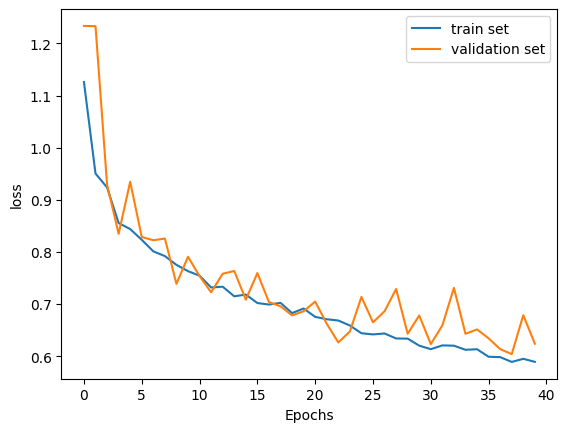

In [50]:
show_metrics(history, 'loss')

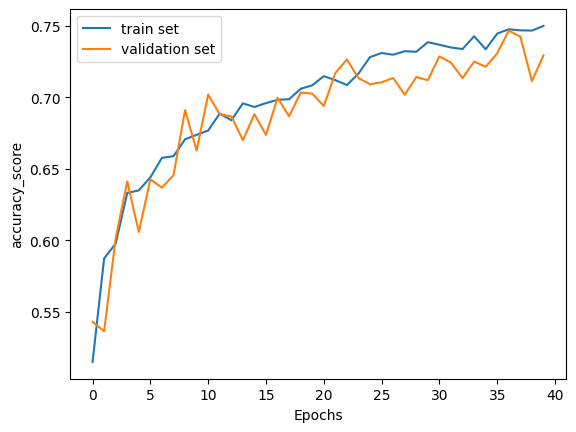

In [51]:
show_metrics(history, 'accuracy_score')

In [47]:
def evaluate(test_data, model):

    loss_fn = nn.CrossEntropyLoss()

    t_model = model.to(device)
    
    total_loss = 0
    total_acc = 0
    
    with torch.no_grad():
        for x_test, y_test in tqdm(test_data):
            x_test = x_test.to(device)
            y_test = y_test.to(device)
    
            y_preds = t_model(x_test)
    
            cur_loss = loss_fn(y_preds, y_test)
            total_loss += cur_loss.item()
    
            y_preds = torch.argmax(y_preds, dim=1)
            cur_acc = accuracy_score(y_test.cpu().numpy(), y_preds.cpu().numpy())
            total_acc += cur_acc.item()
    
    
    loss = total_loss / len(test_dl)
    acc = total_acc / len(test_dl)

    return f"[Loss: {round(loss, 2)}, accuracy: {round(acc, 2)}]"



In [47]:
evaluate(test_dl, model)

100%|██████████| 87/87 [00:17<00:00,  4.88it/s]


'[Loss: 0.65, accuracy: 0.72]'

In [55]:
# torch.save(model, "model.pt")

In [56]:
classes

['adults', 'childs', 'olds', 'seniors', 'teens']

100%|██████████| 87/87 [00:18<00:00,  4.75it/s]


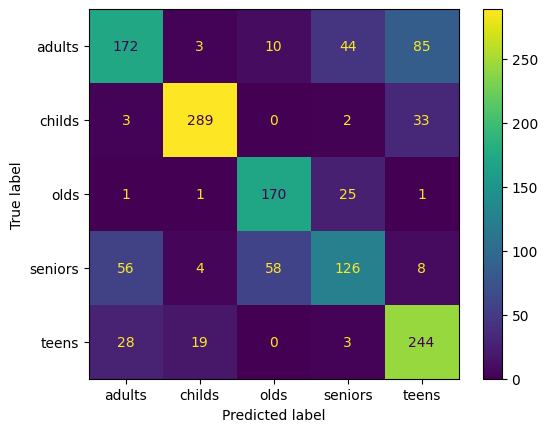

In [52]:
import torch
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm import tqdm


t_model = model.to(device)

y_true = []
y_preds = []


with torch.no_grad():
    for x_test, y_test in tqdm(test_dl):
        x_test = x_test.to(device)
        y_test = y_test.to(device)

        pred = t_model(x_test)
    
        y_pred = torch.argmax(pred, dim=1)

        y_true.extend(y_test.cpu().numpy())
        y_preds.extend(y_pred.cpu().numpy())

y_true = np.array(y_true)
y_preds = np.array(y_preds)


ConfusionMatrixDisplay.from_predictions(y_true, y_preds, display_labels=classes)


In [53]:
torch.save(model.state_dict(), 'large_model.pt')

In [62]:
import numpy as np


def get_tensor(link, output = False):
    img1 = Image.open(link)
    
    transform = transforms.Compose([
        transforms.Resize((224, 224)), 
        transforms.ToTensor(),  
    ])
    
    img_tensor = transform(img1)
    img_tensor = img_tensor.to("cpu")
    
    if output == True:
        t_img1 = img_tensor.permute(2, 1, 0)
        plt.imshow(t_img1.cpu().numpy())

    return img_tensor

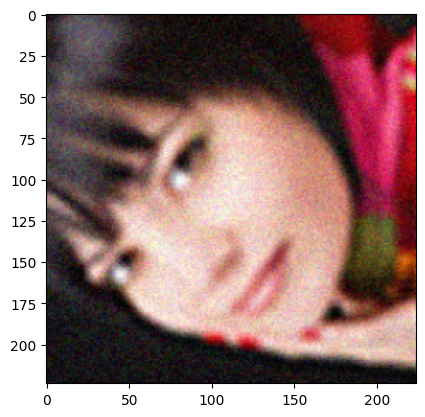

In [63]:
data = get_tensor("/kaggle/input/test-faces-img/faces/2.jpg", output = True)

In [66]:
def predict(data):
    
    t_model = model.to("cpu")
    data = data.unsqueeze(0)
    res = t_model(data)
    fin_res = torch.argmax(res, dim=1)
    
    idx = int(fin_res.item())

    return f"Person is {classes[idx]}"

In [67]:
print(predict(data))

Person is teens


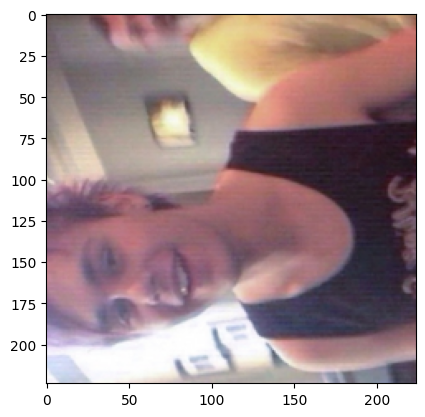

In [68]:
data2 = get_tensor("/kaggle/input/test-faces-img/faces/3.jpg", output = True)

In [69]:
print(predict(data2))

Person is olds


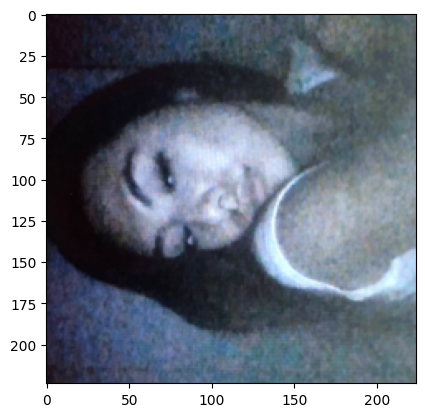

In [70]:
data3 = get_tensor("/kaggle/input/test-faces-img/faces/4.jpg", output = True)

In [71]:
print(predict(data3))

Person is olds


In [31]:
model = AgeModel()
model.load_state_dict(torch.load('/kaggle/input/model-for-dist/large_model.pt'))

/tmp/ipykernel_30/2684720586.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/input/model-for-dist/large_model.pt'))


<All keys matched successfully>

In [37]:
model

AgeModel(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1

In [65]:
 # class SmallModel(nn.Module):
 #    def __init__(self, outputs = 5):
 #        super().__init__()
 #        # 3, 224, 224
 #        self.conv1 = nn.Conv2d(3, 64, kernel_size=1, stride = 1, padding=1)
 #        self.pool1 = nn.MaxPool2d(stride=2,kernel_size=2)
 #        # 64, 112, 112
 #        self.conv2 = nn.Conv2d(64, 128, kernel_size=1, stride = 1, padding=1)
 #        self.pool2 = nn.MaxPool2d(stride=2,kernel_size=2)
 #        # 128, 64, 64
 #        self.conv2_1 = nn.Conv2d(128, 128, kernel_size=1, stride = 1, padding=1)
 #        self.pool2_1 = nn.MaxPool2d(stride=2,kernel_size=2)
 #        # 128, 32, 32
 #        self.conv3 = nn.Conv2d(128, 256, kernel_size=1, stride = 1, padding=1)
 #        self.bnorm1 = nn.BatchNorm2d(256)
 #        self.pool3 = nn.MaxPool2d(stride=2,kernel_size=2)
 #        # 256, 16, 16
 #        self.conv4 = nn.Conv2d(256, 512, kernel_size=1, stride = 1, padding=1)
 #        self.pool4 = nn.MaxPool2d(stride=2,kernel_size=2)
 #        # 512, 8, 8
 #        self.conv5 = nn.Conv2d(512, 512, kernel_size=1, stride = 1, padding=1)
 #        self.pool5 = nn.MaxPool2d(stride=2,kernel_size=2)
 #        # 512, 4, 4
 #        self.conv6 = nn.Conv2d(512, 512, kernel_size=1, stride = 1, padding=1)
 #        self.pool6 = nn.MaxPool2d(stride=2,kernel_size=2)
 #        # 512, 2, 2

 #        self.av_pooling = nn.AdaptiveAvgPool2d(1)

 #        self.linear1 = nn.Linear(512, 128)
 #        self.bnorm1_1 = nn.BatchNorm1d(128)
 #        self.drop1 = nn.Dropout(0.3)

 #        self.linear2 = nn.Linear(128, 32)
 #        self.linear3 = nn.Linear(32, outputs)


 #    def forward(self, x):
 #        out = self.conv1(x)
 #        out = F.relu(out)
 #        out = self.pool1(out)

 #        out = self.conv2(out)
 #        out = F.relu(out)
 #        out = self.pool2(out) 

 #        out = self.conv2_1(out)
 #        out = F.relu(out)
 #        out = self.pool2_1(out)

 #        out = self.conv3(out)
 #        out = F.relu(out)
 #        out = self.bnorm1(out)
 #        out = self.pool3(out)

 #        out = self.conv4(out)
 #        out = F.relu(out)
 #        out = self.pool4(out)

 #        out = self.conv5(out)
 #        out = F.relu(out)
 #        out = self.pool5(out)

 #        out = self.conv6(out)
 #        out = F.relu(out)
 #        out = self.pool6(out)

 #        out = self.av_pooling(out)
 #        out = out.view(out.size(0), -1)

 #        out = self.linear1(out)
 #        out = self.bnorm1_1(out)
 #        out = F.relu(out)
 #        out = self.drop1(out)

 #        out = self.linear2(out)
 #        out = F.relu(out)

 #        res = self.linear3(out)

 #        return res

 #    def predict(self, x):
 #        self.eval()

 #        with torch.no_grad():
 #            res = self.forward(x)
 #            pred = torch.softmax(res, dim=1)
            
 #        return pred

In [33]:
class SimpleResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, bnorm = False):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        
        if bnorm == True:
            self.bnorm1 = nn.BatchNorm2d(out_channels)
        else:
             self.bnorm1 = None 
            
        self.shortcut = nn.Sequential()
        
        if in_channels != out_channels:
            self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        residual = self.shortcut(x) 
        out = self.conv1(x)
        
        out = F.relu(out)
        out = self.conv2(out)
        out = F.relu(out)

        if self.bnorm1:
            out = self.bnorm1(out)
        
        out += residual  
        out = F.relu(out)
        return out

class SmallModel(nn.Module):
    def __init__(self, outputs=5):
        super().__init__()
        # 3, 224, 224
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding = 3)
        self.pool1 = nn.MaxPool2d(stride=2, kernel_size=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding = 3)
        self.pool2 = nn.MaxPool2d(stride=2, kernel_size=2)
        # 64, 56, 56
        self.block2 = SimpleResNetBlock(64, 128, bnorm = True)
        self.pool2 = nn.MaxPool2d(stride=2, kernel_size=2)
        
        # 128, 28, 28
        self.block3 = SimpleResNetBlock(128, 256, bnorm = True)
        self.pool3 = nn.MaxPool2d(stride=2, kernel_size=2)
        # 256, 14, 14
        
        self.conv4 = nn.Conv2d(256, 512, kernel_size = 3, padding = 1)
        self.pool4 = nn.MaxPool2d(stride=2, kernel_size=2)
        # 512, 7, 7

        
        self.conv5 = nn.Conv2d(512, 512, kernel_size = 3, padding = 1)
        self.pool5 = nn.MaxPool2d(stride=2, kernel_size=2)


        self.flatten = nn.Flatten()
        
        self.linear1 = nn.Linear(512, 128)
        self.bnorm1_1 = nn.BatchNorm1d(128)
        self.drop1 = nn.Dropout(0.25)

        self.linear2 = nn.Linear(128, 32)
        self.drop2 = nn.Dropout(0.25)
        
        self.linear3 = nn.Linear(32, outputs)

    def forward(self, x):
        out = self.conv1(x)
        out = self.pool1(out)
        out = F.relu(out)

        out = self.conv2(out)
        out = self.pool2(out)
        out = F.relu(out)

        out = self.block2(out)
        out = self.pool2(out)
    
        out = self.block3(out)
        out = self.pool3(out)
        out = self.pool3(out)

        out = self.conv4(out)
        out = F.relu(out)
        out = self.pool4(out)
        

        out = self.conv5(out)
        out = F.relu(out)
        out = self.pool5(out)

        # out = self.av_pooling(out)
        # out = out.view(out.size(0), -1)

        out = self.flatten(out)

        out = self.linear1(out)
        out = self.bnorm1_1(out)
        out = F.relu(out)
        # out = self.drop1(out)

        out = self.linear2(out)
        out = F.relu(out)
        out = self.drop2(out)
        
        res = self.linear3(out)
        
        # res = self.linear3(out)

        return res

    def predict(self, x):
        self.eval()

        with torch.no_grad():
            res = self.forward(x)
            pred = torch.softmax(res, dim=1)

        return pred


In [49]:
 # class SmallModel(nn.Module):
 #    def __init__(self, outputs = 5):
 #        super().__init__()
        
 #        # 3, 224, 224
 #        # self.conv1 = ConvBlock(3, 32)
 #        # 32, 112, 112
 #        self.conv1_1 = ConvBlock(32, 64)
 #        # 64, 56, 56
 #        self.conv2 = ConvBlock(64, 128)
 #        # 128, 28, 28
 #        self.conv2_1 = ConvBlock(128, 128)
 #        # 128, 14, 14
 #        self.conv3 = ConvBlock(128, 256)
 #        # 256, 7, 7
 #        self.conv4 = ConvBlock(256, 256)
 #        # 256, 3, 3
 #        self.conv5 = ConvBlock(256, 512)
 #        # 512, 1, 1
 #        self.conv6 = ConvBlock(512, 512, bnorm = False)
 #        # 512, 1, 1

 #        self.flatten = nn.Flatten()

 #        self.av_pooling = nn.AdaptiveAvgPool2d(1)

       
 #        self.linear1 = Linear(512, 64, bnorm=False, drop_out_value=0.3)
 #        self.linear3 = Linear(64, outputs, bnorm=True, output_layer=True)

 #    # def forward(self, x):
 #        out = self.conv1(x)
 #        out = self.conv1_1(out)
 #        out = self.conv2(out)
 #        out = self.conv2_1(out)
 #        out = self.conv3(out)
 #        # out = self.conv4(out)
 #        out = self.conv5(out)
 #        out = self.conv6(out)

 #        # out = self.flatten(out)

 #        out = self.av_pooling(out)
 #        out = out.view(out.size(0), -1)
        
 #        out = self.linear1(out)
 #        # out = self.linear2(out)
 #        res = self.linear3(out)
       
       
        

 #        return res

 #    def predict(self, x):
 #        self.eval()

 #        with torch.no_grad():

 #            t_pred = self.forward(x)
 #            pred = torch.softmax(t_pred, dim=1)

 #        return pred
    
    

In [34]:
student_model = SmallModel()
student_model.to(device)

SmallModel(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (block2): SimpleResNetBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (block3): SimpleResNetBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bnorm1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): C

In [35]:
summary(student_model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 226, 226]           2,432
         MaxPool2d-2         [-1, 32, 113, 113]               0
            Conv2d-3         [-1, 64, 115, 115]          51,264
         MaxPool2d-4           [-1, 64, 57, 57]               0
            Conv2d-5          [-1, 128, 57, 57]           8,320
            Conv2d-6          [-1, 128, 57, 57]          73,856
            Conv2d-7          [-1, 128, 57, 57]         147,584
       BatchNorm2d-8          [-1, 128, 57, 57]             256
 SimpleResNetBlock-9          [-1, 128, 57, 57]               0
        MaxPool2d-10          [-1, 128, 28, 28]               0
           Conv2d-11          [-1, 256, 28, 28]          33,024
           Conv2d-12          [-1, 256, 28, 28]         295,168
           Conv2d-13          [-1, 256, 28, 28]         590,080
      BatchNorm2d-14          [-1, 256,

In [37]:
import time
import torch
from tqdm import tqdm
import torch.nn.functional as F

def distillation_train(student_model, teacher_model, optimizer, train_dl, val_dl,
          loss_fn_ce, loss_fn_kl, temperature=5, alpha=0.5,
          metrics=None, metrics_name=None, epochs=20, device='cpu', task='regression'):
    
    print('train() called: student_model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(student_model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    metrics = metrics if metrics else []
    metrics_name = metrics_name if metrics_name else [metric.__name__ for metric in metrics]

    history = {} 
    history['loss'] = []
    history['val_loss'] = []
    for name in metrics_name:
        history[name] = []
        history[f'val_{name}'] = []

    start_time_train = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        start_time_epoch = time.time()

        student_model.train()
        teacher_model.eval()  # учитель заморожен для дистилляции
        history_train = {name: 0 for name in ['loss'] + metrics_name}

        for batch in tqdm(train_dl):
            x = batch[0].to(device)
            y = batch[1].to(device)

            # Получение предсказаний от обеих моделей
            with torch.no_grad():
                teacher_logits = teacher_model(x)

            student_logits = student_model(x)
            
            # usual losses
            loss_hard = loss_fn_ce(student_logits, y)
            
            # losses with KL-divergention 
            loss_soft = loss_fn_kl(
                F.log_softmax(student_logits / temperature, dim=1),
                F.softmax(teacher_logits / temperature, dim=1)
            )
            
            # full loss
            loss = alpha * loss_hard + (1 - alpha) * loss_soft * (temperature ** 2)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            student_logits = student_logits.detach().cpu().numpy()
            y = y.detach().cpu().numpy()

            history_train['loss'] += loss.item() * x.size(0)
            for name, func in zip(metrics_name, metrics):
                try:
                    history_train[name] += func(y, student_logits) * x.size(0)
                except:
                    if task == 'binary': y_pred_ = student_logits.round()
                    elif task == 'multiclass': y_pred_ = student_logits.argmax(axis=-1)
                    history_train[name] += func(y, y_pred_) * x.size(0)

        for name in history_train:
            history_train[name] /= len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        student_model.eval()
        history_val = {'val_' + name: 0 for name in metrics_name + ['loss']}

        with torch.no_grad():
            for batch in tqdm(val_dl):
                x = batch[0].to(device)
                y = batch[1].to(device)

                student_logits = student_model(x)
                loss = loss_fn_ce(student_logits, y)

                student_logits = student_logits.cpu().numpy()
                y = y.cpu().numpy()

                history_val['val_loss'] += loss.item() * x.size(0)
                for name, func in zip(metrics_name, metrics):
                    try:
                        history_val['val_' + name] += func(y, student_logits) * x.size(0)
                    except:
                        if task == 'binary': y_pred_ = student_logits.round()
                        elif task == 'multiclass': y_pred_ = student_logits.argmax(axis=-1)
                        history_val['val_' + name] += func(y, y_pred_) * x.size(0)

        for name in history_val:
            history_val[name] /= len(val_dl.dataset)

        # PRINTING RESULTS

        end_time_epoch = time.time()

        for name in history_train:
            history[name].append(history_train[name])
            history['val_' + name].append(history_val['val_' + name])

        total_time_epoch = end_time_epoch - start_time_epoch

        print(f'Epoch {epoch+1:4d} {total_time_epoch:4.0f}sec', end='\t')
        for name in history_train:
            print(f'{name}: {history[name][-1]:10.3g}', end='\t')
            print(f"val_{name}: {history['val_' + name][-1]:10.3g}", end='\t')
        print()

    # END OF TRAINING LOOP

    end_time_train = time.time()
    total_time_train = end_time_train - start_time_train
    print()
    print('Time total:     %5.2f sec' % (total_time_train))

    return history


In [38]:
student_optim = torch.optim.AdamW(student_model.parameters(), lr=1e-3, weight_decay = 1e-4)
# student_optim = torch.optim.Adagrad(student_model.parameters(), lr=1e-3) 
# student_optim = torch.optim.RMSprop(student_model.parameters(), lr=1e-3, momentum = 0.9)
# student_optim = torch.optim.SGD(student_model.parameters(), lr=1e-3, momentum = 0.9)
# student_optim = torch.optim.Adam(student_model.parameters(), lr=1e-3)


criterion_ce = nn.CrossEntropyLoss()  
criterion_kl = nn.KLDivLoss(reduction='batchmean')  

In [39]:
batch_size = 64
train_dl = DataLoader(train_dataset, batch_size = batch_size, generator = torch.Generator(device="cpu"))
val_dl = DataLoader(val_dataset, batch_size = batch_size, generator = torch.Generator(device="cpu"))

In [40]:
student_model = student_model.to(device)
teacher_model = model.to(device)

In [41]:
history = distillation_train(student_model = student_model, teacher_model = teacher_model, optimizer = student_optim, train_dl = train_dl, val_dl = val_dl, 
                             loss_fn_ce = criterion_ce, loss_fn_kl = criterion_kl, epochs = 100, device = device, metrics = [accuracy_score], task = "multiclass")

train() called: student_model=SmallModel, opt=AdamW(lr=0.001000), epochs=100, device=cuda



100%|██████████| 23/23 [00:07<00:00,  3.21it/s]


Epoch    1   87sec	loss:       4.23	val_loss:       1.69	accuracy_score:      0.287	val_accuracy_score:       0.23	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch    2   85sec	loss:        3.9	val_loss:       8.15	accuracy_score:      0.344	val_accuracy_score:      0.175	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch    3   85sec	loss:       3.81	val_loss:       4.38	accuracy_score:      0.347	val_accuracy_score:      0.258	


100%|██████████| 23/23 [00:06<00:00,  3.35it/s]


Epoch    4   86sec	loss:       3.22	val_loss:       4.99	accuracy_score:      0.405	val_accuracy_score:      0.188	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch    5   85sec	loss:       2.55	val_loss:       2.41	accuracy_score:      0.464	val_accuracy_score:      0.265	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch    6   85sec	loss:       2.21	val_loss:       1.87	accuracy_score:      0.509	val_accuracy_score:      0.369	


100%|██████████| 23/23 [00:06<00:00,  3.31it/s]


Epoch    7   85sec	loss:       2.02	val_loss:       3.16	accuracy_score:      0.537	val_accuracy_score:      0.242	


100%|██████████| 23/23 [00:06<00:00,  3.34it/s]


Epoch    8   86sec	loss:       1.92	val_loss:       1.87	accuracy_score:      0.544	val_accuracy_score:      0.378	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch    9   85sec	loss:       1.84	val_loss:       1.72	accuracy_score:      0.554	val_accuracy_score:      0.464	


100%|██████████| 23/23 [00:07<00:00,  3.27it/s]


Epoch   10   86sec	loss:       1.79	val_loss:       1.27	accuracy_score:      0.563	val_accuracy_score:      0.551	


100%|██████████| 23/23 [00:06<00:00,  3.47it/s]


Epoch   11   86sec	loss:       1.71	val_loss:       4.98	accuracy_score:      0.576	val_accuracy_score:      0.319	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   12   86sec	loss:       1.68	val_loss:       1.48	accuracy_score:      0.578	val_accuracy_score:      0.456	


100%|██████████| 23/23 [00:06<00:00,  3.47it/s]


Epoch   13   86sec	loss:       1.63	val_loss:        3.7	accuracy_score:      0.588	val_accuracy_score:      0.257	


100%|██████████| 23/23 [00:06<00:00,  3.58it/s]


Epoch   14   85sec	loss:       1.59	val_loss:       4.37	accuracy_score:      0.593	val_accuracy_score:       0.21	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   15   86sec	loss:       1.58	val_loss:      0.911	accuracy_score:      0.593	val_accuracy_score:      0.603	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   16   85sec	loss:       1.52	val_loss:       2.47	accuracy_score:      0.601	val_accuracy_score:      0.417	


100%|██████████| 23/23 [00:06<00:00,  3.50it/s]


Epoch   17   85sec	loss:       1.46	val_loss:        1.4	accuracy_score:       0.61	val_accuracy_score:      0.513	


100%|██████████| 23/23 [00:06<00:00,  3.54it/s]


Epoch   18   85sec	loss:       1.46	val_loss:       1.89	accuracy_score:       0.61	val_accuracy_score:      0.452	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   19   86sec	loss:       1.43	val_loss:       2.54	accuracy_score:      0.616	val_accuracy_score:       0.42	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   20   85sec	loss:       1.38	val_loss:       1.19	accuracy_score:      0.617	val_accuracy_score:      0.563	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   21   86sec	loss:       1.36	val_loss:       1.23	accuracy_score:      0.618	val_accuracy_score:      0.557	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   22   85sec	loss:       1.36	val_loss:       2.69	accuracy_score:      0.629	val_accuracy_score:      0.423	


100%|██████████| 23/23 [00:06<00:00,  3.58it/s]


Epoch   23   85sec	loss:       1.32	val_loss:      0.885	accuracy_score:      0.627	val_accuracy_score:      0.633	


100%|██████████| 23/23 [00:06<00:00,  3.58it/s]


Epoch   24   85sec	loss:       1.28	val_loss:       1.16	accuracy_score:      0.635	val_accuracy_score:      0.569	


100%|██████████| 23/23 [00:06<00:00,  3.60it/s]


Epoch   25   85sec	loss:       1.26	val_loss:      0.926	accuracy_score:      0.639	val_accuracy_score:      0.625	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   26   85sec	loss:       1.25	val_loss:      0.925	accuracy_score:      0.636	val_accuracy_score:      0.633	


100%|██████████| 23/23 [00:06<00:00,  3.45it/s]


Epoch   27   85sec	loss:       1.24	val_loss:      0.909	accuracy_score:      0.647	val_accuracy_score:      0.632	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   28   85sec	loss:       1.22	val_loss:       1.51	accuracy_score:      0.649	val_accuracy_score:      0.522	


100%|██████████| 23/23 [00:06<00:00,  3.59it/s]


Epoch   29   85sec	loss:       1.21	val_loss:      0.808	accuracy_score:      0.646	val_accuracy_score:      0.635	


100%|██████████| 23/23 [00:06<00:00,  3.45it/s]


Epoch   30   86sec	loss:       1.18	val_loss:      0.818	accuracy_score:      0.653	val_accuracy_score:      0.645	


100%|██████████| 23/23 [00:06<00:00,  3.59it/s]


Epoch   31   86sec	loss:       1.16	val_loss:      0.807	accuracy_score:      0.652	val_accuracy_score:      0.651	


100%|██████████| 23/23 [00:06<00:00,  3.50it/s]


Epoch   32   85sec	loss:       1.15	val_loss:      0.991	accuracy_score:      0.653	val_accuracy_score:      0.625	


100%|██████████| 23/23 [00:06<00:00,  3.58it/s]


Epoch   33   85sec	loss:       1.17	val_loss:       0.95	accuracy_score:      0.655	val_accuracy_score:      0.631	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   34   85sec	loss:       1.14	val_loss:      0.955	accuracy_score:      0.655	val_accuracy_score:      0.619	


100%|██████████| 23/23 [00:06<00:00,  3.53it/s]


Epoch   35   84sec	loss:       1.12	val_loss:       1.09	accuracy_score:      0.657	val_accuracy_score:      0.598	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   36   85sec	loss:       1.11	val_loss:       1.09	accuracy_score:      0.661	val_accuracy_score:      0.574	


100%|██████████| 23/23 [00:06<00:00,  3.52it/s]


Epoch   37   86sec	loss:       1.09	val_loss:      0.897	accuracy_score:      0.664	val_accuracy_score:      0.649	


100%|██████████| 23/23 [00:06<00:00,  3.45it/s]


Epoch   38   85sec	loss:       1.09	val_loss:      0.833	accuracy_score:      0.668	val_accuracy_score:      0.634	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   39   85sec	loss:       1.07	val_loss:       1.03	accuracy_score:      0.671	val_accuracy_score:      0.598	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   40   85sec	loss:       1.07	val_loss:      0.806	accuracy_score:      0.677	val_accuracy_score:      0.665	


100%|██████████| 23/23 [00:06<00:00,  3.45it/s]


Epoch   41   85sec	loss:       1.05	val_loss:      0.788	accuracy_score:      0.672	val_accuracy_score:      0.667	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   42   85sec	loss:       1.04	val_loss:      0.793	accuracy_score:      0.676	val_accuracy_score:      0.667	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   43   86sec	loss:       1.04	val_loss:      0.781	accuracy_score:      0.674	val_accuracy_score:      0.662	


100%|██████████| 23/23 [00:06<00:00,  3.47it/s]


Epoch   44   86sec	loss:       1.03	val_loss:       0.82	accuracy_score:      0.679	val_accuracy_score:       0.66	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   45   85sec	loss:       1.03	val_loss:       1.13	accuracy_score:      0.683	val_accuracy_score:      0.594	


100%|██████████| 23/23 [00:06<00:00,  3.52it/s]


Epoch   46   85sec	loss:       1.03	val_loss:       1.61	accuracy_score:       0.68	val_accuracy_score:      0.493	


100%|██████████| 23/23 [00:06<00:00,  3.40it/s]


Epoch   47   86sec	loss:       1.01	val_loss:      0.773	accuracy_score:      0.687	val_accuracy_score:      0.677	


100%|██████████| 23/23 [00:06<00:00,  3.51it/s]


Epoch   48   86sec	loss:          1	val_loss:      0.817	accuracy_score:      0.684	val_accuracy_score:      0.666	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   49   85sec	loss:      0.992	val_loss:       1.12	accuracy_score:      0.692	val_accuracy_score:        0.6	


100%|██████████| 23/23 [00:06<00:00,  3.31it/s]


Epoch   50   85sec	loss:      0.979	val_loss:       1.05	accuracy_score:      0.691	val_accuracy_score:      0.594	


100%|██████████| 23/23 [00:06<00:00,  3.51it/s]


Epoch   51   86sec	loss:      0.977	val_loss:      0.866	accuracy_score:      0.688	val_accuracy_score:      0.645	


100%|██████████| 23/23 [00:06<00:00,  3.60it/s]


Epoch   52   86sec	loss:      0.984	val_loss:      0.746	accuracy_score:      0.686	val_accuracy_score:      0.685	


100%|██████████| 23/23 [00:06<00:00,  3.52it/s]


Epoch   53   86sec	loss:       0.95	val_loss:      0.834	accuracy_score:      0.695	val_accuracy_score:      0.659	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   54   85sec	loss:      0.944	val_loss:      0.744	accuracy_score:      0.691	val_accuracy_score:      0.677	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   55   86sec	loss:      0.967	val_loss:      0.735	accuracy_score:      0.691	val_accuracy_score:      0.698	


100%|██████████| 23/23 [00:06<00:00,  3.50it/s]


Epoch   56   85sec	loss:      0.947	val_loss:      0.714	accuracy_score:      0.695	val_accuracy_score:      0.692	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   57   85sec	loss:      0.947	val_loss:      0.915	accuracy_score:      0.695	val_accuracy_score:      0.651	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   58   85sec	loss:      0.948	val_loss:      0.923	accuracy_score:      0.693	val_accuracy_score:      0.618	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   59   85sec	loss:      0.932	val_loss:      0.753	accuracy_score:      0.699	val_accuracy_score:      0.684	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   60   85sec	loss:      0.936	val_loss:      0.966	accuracy_score:      0.693	val_accuracy_score:      0.615	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   61   85sec	loss:       0.92	val_loss:      0.682	accuracy_score:      0.707	val_accuracy_score:      0.711	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   62   85sec	loss:      0.903	val_loss:      0.739	accuracy_score:      0.706	val_accuracy_score:      0.676	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   63   85sec	loss:      0.909	val_loss:      0.874	accuracy_score:      0.705	val_accuracy_score:      0.642	


100%|██████████| 23/23 [00:06<00:00,  3.54it/s]


Epoch   64   85sec	loss:      0.903	val_loss:      0.693	accuracy_score:      0.709	val_accuracy_score:      0.702	


100%|██████████| 23/23 [00:06<00:00,  3.39it/s]


Epoch   65   85sec	loss:       0.91	val_loss:      0.899	accuracy_score:      0.699	val_accuracy_score:      0.641	


100%|██████████| 23/23 [00:06<00:00,  3.54it/s]


Epoch   66   85sec	loss:      0.896	val_loss:      0.726	accuracy_score:      0.713	val_accuracy_score:      0.692	


100%|██████████| 23/23 [00:06<00:00,  3.53it/s]


Epoch   67   85sec	loss:      0.886	val_loss:      0.761	accuracy_score:       0.71	val_accuracy_score:      0.676	


100%|██████████| 23/23 [00:06<00:00,  3.58it/s]


Epoch   68   85sec	loss:      0.888	val_loss:      0.762	accuracy_score:       0.71	val_accuracy_score:      0.695	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   69   84sec	loss:      0.871	val_loss:      0.848	accuracy_score:      0.712	val_accuracy_score:      0.676	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   70   85sec	loss:      0.869	val_loss:      0.732	accuracy_score:      0.711	val_accuracy_score:      0.715	


100%|██████████| 23/23 [00:06<00:00,  3.46it/s]


Epoch   71   85sec	loss:      0.866	val_loss:      0.669	accuracy_score:      0.712	val_accuracy_score:      0.707	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   72   85sec	loss:      0.856	val_loss:      0.722	accuracy_score:      0.713	val_accuracy_score:      0.705	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   73   85sec	loss:      0.857	val_loss:      0.809	accuracy_score:       0.72	val_accuracy_score:      0.672	


100%|██████████| 23/23 [00:06<00:00,  3.58it/s]


Epoch   74   85sec	loss:      0.861	val_loss:      0.703	accuracy_score:      0.718	val_accuracy_score:      0.723	


100%|██████████| 23/23 [00:06<00:00,  3.53it/s]


Epoch   75   85sec	loss:      0.849	val_loss:      0.686	accuracy_score:      0.724	val_accuracy_score:      0.696	


100%|██████████| 23/23 [00:06<00:00,  3.58it/s]


Epoch   76   86sec	loss:      0.859	val_loss:      0.643	accuracy_score:      0.715	val_accuracy_score:      0.733	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   77   86sec	loss:      0.839	val_loss:      0.666	accuracy_score:      0.725	val_accuracy_score:      0.727	


100%|██████████| 23/23 [00:06<00:00,  3.54it/s]


Epoch   78   85sec	loss:      0.847	val_loss:       0.67	accuracy_score:      0.717	val_accuracy_score:      0.706	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   79   86sec	loss:      0.828	val_loss:      0.653	accuracy_score:      0.725	val_accuracy_score:      0.734	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   80   85sec	loss:      0.833	val_loss:      0.745	accuracy_score:      0.718	val_accuracy_score:       0.69	


100%|██████████| 23/23 [00:06<00:00,  3.54it/s]


Epoch   81   86sec	loss:      0.819	val_loss:      0.707	accuracy_score:      0.722	val_accuracy_score:      0.695	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   82   85sec	loss:       0.82	val_loss:      0.671	accuracy_score:       0.73	val_accuracy_score:      0.711	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   83   85sec	loss:      0.826	val_loss:      0.634	accuracy_score:      0.727	val_accuracy_score:      0.734	


100%|██████████| 23/23 [00:06<00:00,  3.48it/s]


Epoch   84   85sec	loss:      0.826	val_loss:      0.702	accuracy_score:      0.729	val_accuracy_score:      0.708	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   85   85sec	loss:       0.82	val_loss:      0.744	accuracy_score:      0.728	val_accuracy_score:      0.685	


100%|██████████| 23/23 [00:06<00:00,  3.53it/s]


Epoch   86   85sec	loss:      0.822	val_loss:      0.618	accuracy_score:      0.728	val_accuracy_score:      0.734	


100%|██████████| 23/23 [00:06<00:00,  3.33it/s]


Epoch   87   85sec	loss:      0.798	val_loss:      0.698	accuracy_score:      0.735	val_accuracy_score:      0.699	


100%|██████████| 23/23 [00:06<00:00,  3.58it/s]


Epoch   88   85sec	loss:      0.792	val_loss:      0.645	accuracy_score:      0.729	val_accuracy_score:      0.729	


100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


Epoch   89   85sec	loss:      0.788	val_loss:      0.678	accuracy_score:      0.733	val_accuracy_score:      0.711	


100%|██████████| 23/23 [00:07<00:00,  3.27it/s]


Epoch   90   86sec	loss:      0.799	val_loss:      0.701	accuracy_score:      0.736	val_accuracy_score:      0.707	


100%|██████████| 23/23 [00:06<00:00,  3.54it/s]


Epoch   91   85sec	loss:      0.796	val_loss:      0.697	accuracy_score:      0.732	val_accuracy_score:      0.713	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   92   85sec	loss:       0.79	val_loss:      0.721	accuracy_score:      0.735	val_accuracy_score:      0.702	


100%|██████████| 23/23 [00:06<00:00,  3.43it/s]


Epoch   93   85sec	loss:      0.792	val_loss:      0.631	accuracy_score:      0.737	val_accuracy_score:      0.736	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   94   85sec	loss:      0.782	val_loss:      0.715	accuracy_score:      0.739	val_accuracy_score:      0.718	


100%|██████████| 23/23 [00:06<00:00,  3.57it/s]


Epoch   95   85sec	loss:      0.777	val_loss:       0.58	accuracy_score:      0.739	val_accuracy_score:      0.758	


100%|██████████| 23/23 [00:06<00:00,  3.47it/s]


Epoch   96   85sec	loss:      0.772	val_loss:      0.679	accuracy_score:      0.742	val_accuracy_score:       0.72	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   97   84sec	loss:      0.777	val_loss:      0.662	accuracy_score:      0.741	val_accuracy_score:      0.725	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]


Epoch   98   85sec	loss:      0.775	val_loss:      0.632	accuracy_score:      0.741	val_accuracy_score:      0.752	


100%|██████████| 23/23 [00:06<00:00,  3.31it/s]


Epoch   99   85sec	loss:      0.774	val_loss:      0.664	accuracy_score:      0.735	val_accuracy_score:      0.727	


100%|██████████| 23/23 [00:06<00:00,  3.55it/s]

Epoch  100   85sec	loss:      0.772	val_loss:      0.609	accuracy_score:      0.733	val_accuracy_score:      0.749	

Time total:     8525.79 sec


In [43]:
batch_size = 64
test_dl = DataLoader(test_dataset, batch_size = batch_size, generator = torch.Generator(device="cpu"))

In [48]:
evaluate(test_dl, student_model)

100%|██████████| 23/23 [00:06<00:00,  3.52it/s]


'[Loss: 0.62, accuracy: 0.73]'

100%|██████████| 23/23 [00:06<00:00,  3.56it/s]


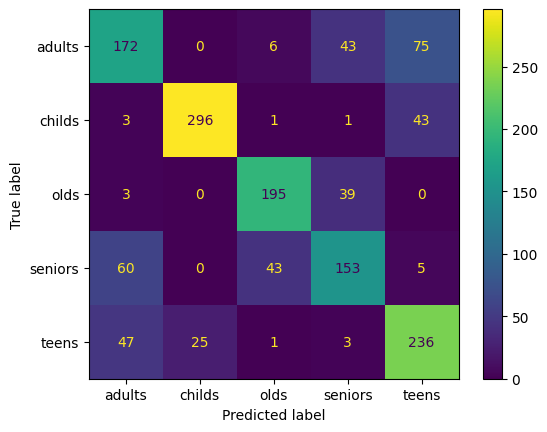

In [50]:
t_model = student_model.to(device)

y_true = []
y_preds = []


with torch.no_grad():
    for x_test, y_test in tqdm(test_dl):
        x_test = x_test.to(device)
        y_test = y_test.to(device)

        pred = t_model(x_test)
    
        y_pred = torch.argmax(pred, dim=1)

        y_true.extend(y_test.cpu().numpy())
        y_preds.extend(y_pred.cpu().numpy())

y_true = np.array(y_true)
y_preds = np.array(y_preds)


ConfusionMatrixDisplay.from_predictions(y_true, y_preds, display_labels=classes)


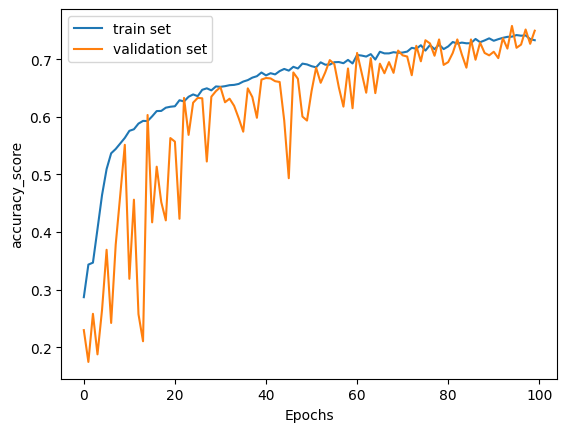

In [53]:
show_metrics(history, 'accuracy_score')

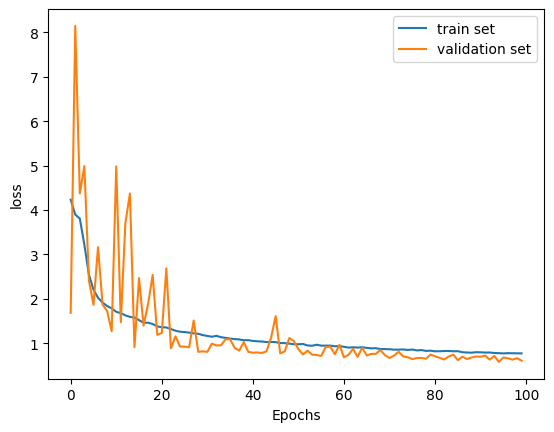

In [54]:
show_metrics(history, 'loss')

In [56]:
torch.save(student_model.state_dict(), 'final_age_model.pt')

In [58]:
test_model = SmallModel()
test_model.load_state_dict(torch.load('/kaggle/working/final_age_model.pt'))

/tmp/ipykernel_30/1613629681.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_model.load_state_dict(torch.load('/kaggle/working/final_age_model.pt'))


<All keys matched successfully>

In [59]:
test_model

SmallModel(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (block2): SimpleResNetBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (block3): SimpleResNetBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bnorm1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): C

In [60]:
evaluate(test_dl, test_model)

100%|██████████| 23/23 [00:06<00:00,  3.54it/s]


'[Loss: 0.63, accuracy: 0.73]'